<a href="https://colab.research.google.com/github/Karampruthi/CE888-Data-Science-Decision-making/blob/main/Lab4/my_recommender_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
from IPython.display import Image
np.set_printoptions(precision = 3)

In [4]:
data = pd.read_csv('https://raw.githubusercontent.com/albanda/CE888/master/lab4-recommender/jester-data-1.csv', header=None)
train_set = data.copy()
train_set = train_set.drop(0,axis=1)
train_set

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,7.33,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,-8.30,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,7.28,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,6.46,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.58,6.31,99.00,99.00,-

In [5]:
test = data.replace(99, np.nan)  # replacing all 99 values with Nan (as written in data description 99 means no rating)
test = test.drop(0,axis=1)       # dropping column 1 as it is the sum of ratings given by user
test

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,-8.50,-6.75,-7.18,8.45,-7.18,-7.52,-7.43,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-9.42,NaN,NaN,NaN,-7.72,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.82,NaN,NaN,NaN,NaN,NaN,-5.63,NaN,NaN,NaN
1,4.08,-0.29,6.36,4.37,-2.38,-9.66,-0.73,-5.34,8.88,9.22,6.75,8.64,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,-0.87,7.91,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,-5.00,2.77,8.30,7.77,7.33,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,4.51,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,3.06,0.34,-4.32,1.07
2,NaN,NaN,NaN,NaN,9.03,9.27,9.03,9.27,NaN,NaN,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,NaN,8.25,NaN,NaN,7.48,7.28,7.28,8.93,NaN,6.17,7.28,NaN,NaN,8.98,7.33,NaN,6.17,9.08,7.33,...,6.46,7.28,NaN,NaN,7.04,7.28,NaN,7.28,8.25,NaN,NaN,NaN,NaN,NaN,NaN,8.93,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.03,NaN,NaN,NaN,9.08,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,8.35,NaN,NaN,1.80,8.16,-2.82,6.21,NaN,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,NaN,NaN,NaN,NaN,2.91,3.93,6.75,6.60,NaN,6.65,-6.12,NaN,7.57,6.21,6.65,NaN,-8.30,7.18,2.82,...,0.00,-3.69,NaN,NaN,7.82,0.24,NaN,7.28,-2.33,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.63,NaN,NaN,-2.33,NaN,NaN,NaN,NaN,NaN,0.53,NaN,NaN,NaN,NaN,NaN,NaN
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,2.72,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,-1.26,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,NaN,NaN,NaN,NaN,NaN,NaN,4.13,NaN,NaN,NaN,5.24,5.92,0.87,7.28,3.93,-0.63,6.31,4.71,2.82,2.96,5.19,5.58,4.27,5.19,5.73,1.55,3.11,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,0.44,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,2.82,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,-0.68,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,1.94,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,9.27,-1.99,-9.95,-9.90,9.13,8.83,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,-8.69,-7.48,-8.83,-1.75,6.60,3.54,1.50,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,-3.06,9.13,8.40,-0.63,-7.18,0.58,8.88,9.27,8.50,...,2.77,8.11,-7.96,8.93,-0.87,-5.87,8.88,-1.12,-8.74,8.74,NaN,NaN,NaN,NaN,NaN,4.90,NaN,NaN,NaN,NaN,-0.29,0.92,-0.78,0.15,-0.10,0.00,-0.19,-0.87,-1.36,-0.58,-1.17,-5.73,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,NaN,NaN,NaN,NaN,-7.77,NaN,6.70,-6.75,NaN,NaN,NaN,NaN,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,NaN,NaN,NaN,NaN,0.49,-0.53,-6.94,-0.49,NaN,6.46,-0.53,NaN,NaN,-7.86,-0.34,NaN,-6.94,NaN,NaN,...,0.49,-0.24,NaN,NaN,-3.11,-6.65,NaN,-0.58,6.31,NaN,NaN,-7.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24981,NaN,NaN,NaN,NaN,-9.71,NaN,4.56,-8.30,NaN,NaN,NaN,NaN,-9.47,NaN,3.45,-0.92,-4.51,-4.13,-5.73,-9.51,2.82,NaN,NaN,NaN,NaN,-0.49,2.91,2.62,8.30,NaN,3.06,5.44,NaN,NaN,-0.68,2.04,NaN,NaN,1.

**best rated jokes**

In [6]:
# best-rated joke
np.argmax(test.mean())

49

**worst-rated jokes**

In [7]:
# worst-rated jokes
np.argmin(test.mean())

57

In [8]:
# In the movies dataset, what's the rating that user 3273 has given to joke 28?

test[28][3273]

-0.92

In [9]:
arr = train_set.values
print(arr.shape)

(24983, 100)


In [10]:
rated = np.where(arr!=99)
print(len(rated[0]), rated[1].shape)

1810455 (1810455,)


In [11]:
def replace(orig, percentage=0.1):
  """
  Replaces 'percentage'% of the original values in 'orig' with 99's
  :param orig: original data array
  :param percentage: percentage of values to replace (0<percentage<1)
  """
  new_data = orig.copy()
  rated = np.where(arr!=99)
  n_rated = len(rated[0])
  idx = np.random.choice(n_rated, size=int(percentage*n_rated), replace=False)
  new_data[rated[0][idx], rated[1][idx]] = 99
  return new_data, (rated[0][idx], rated[1][idx])

In [12]:
new_arr, idx = replace(arr, 0.1)

In [13]:
val_data = pd.DataFrame(new_arr)

In [14]:
val_data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99
0,-7.82,8.79,-9.66,-8.16,-7.52,-8.50,-9.85,4.17,-8.98,-4.76,99.00,-6.75,99.00,8.45,-7.18,-7.52,99.00,-9.81,-9.85,-9.85,-9.37,1.50,-4.37,-9.81,-8.50,1.12,7.82,2.86,9.13,-7.43,2.14,-4.08,-9.08,7.82,5.05,4.95,-9.17,-8.40,-8.40,-8.40,...,8.59,3.59,-6.84,-9.03,2.82,-1.36,-9.08,8.30,5.68,-4.81,99.00,99.00,99.00,99.00,99.00,99.00,99.00,-9.42,99.00,99.00,99.00,-7.72,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,2.82,99.00,99.00,99.00,99.00,99.00,-5.63,99.00,99.00,99.00
1,4.08,-0.29,6.36,4.37,-2.38,99.00,-0.73,-5.34,8.88,9.22,6.75,99.00,4.42,7.43,4.56,-0.97,4.66,-0.68,3.30,-1.21,0.87,8.64,8.35,9.17,0.05,7.57,4.71,0.87,-0.39,6.99,6.50,-0.92,7.14,9.03,-1.80,0.73,7.09,3.40,99.00,99.00,...,-6.70,-3.35,-9.03,4.47,4.08,-3.83,8.74,1.12,0.78,7.52,99.00,2.77,8.30,7.77,99.00,6.21,7.72,8.98,8.64,8.20,3.93,4.85,4.85,6.07,8.98,99.00,-0.05,3.69,4.56,0.58,2.82,-4.95,-0.29,7.86,-0.19,-2.14,99.00,0.34,-4.32,1.07
2,99.00,99.00,99.00,99.00,9.03,9.27,9.03,9.27,99.00,99.00,7.33,7.57,9.37,6.17,-6.36,-6.89,-7.86,9.03,9.03,9.03,7.28,99.00,8.25,99.00,99.00,7.48,7.28,7.28,8.93,99.00,6.17,7.28,99.00,99.00,8.98,99.00,99.00,6.17,9.08,7.33,...,6.46,7.28,99.00,99.00,7.04,7.28,99.00,7.28,8.25,99.00,99.00,99.00,99.00,99.00,99.00,8.93,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,9.03,99.00,99.00,99.00,9.08,99.00,99.00,99.00,99.00,99.00,99.00
3,99.00,8.35,99.00,99.00,1.80,8.16,-2.82,6.21,99.00,1.84,7.33,6.60,6.31,8.11,-7.23,-6.65,1.17,-6.60,-3.64,-2.09,5.34,99.00,99.00,99.00,99.00,2.91,3.93,6.75,6.60,99.00,6.65,-6.12,99.00,7.57,6.21,6.65,99.00,99.00,7.18,2.82,...,0.00,-3.69,99.00,99.00,7.82,0.24,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,99.00,0.63,99.00,99.00,-2.33,99.00,99.00,99.00,99.00,99.00,0.53,99.00,99.00,99.00,99.00,99.00,99.00
4,8.50,4.61,-4.17,-5.39,1.36,1.60,7.04,4.61,-0.44,5.73,8.25,6.84,-3.93,7.23,-2.33,-9.66,99.00,-1.36,2.57,4.51,8.20,6.12,8.30,-1.26,7.77,1.89,-1.17,5.68,8.45,4.61,8.06,-9.47,7.28,5.68,2.48,3.20,99.00,6.80,4.51,2.48,...,7.38,6.17,4.71,-2.28,7.38,4.56,7.14,4.22,3.01,3.83,99.00,99.00,99.00,99.00,99.00,99.00,4.13,99.00,99.00,99.00,5.24,5.92,0.87,99.00,99.00,-0.63,6.31,4.71,99.00,99.00,5.19,5.58,4.27,5.19,5.73,1.55,99.00,6.55,1.80,1.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24978,99.00,7.43,9.08,2.33,3.20,6.75,-8.79,-0.53,-8.74,7.23,-0.53,5.63,-7.14,-4.08,-3.50,-8.20,-3.98,-9.22,-0.15,-6.46,5.63,-0.92,-2.91,-4.17,99.00,3.40,8.64,6.84,6.80,-0.87,7.38,-3.50,8.88,7.43,5.39,2.23,99.00,3.40,-0.58,4.42,...,8.59,3.45,0.87,9.27,-4.66,5.73,-0.49,8.35,99.00,5.00,-9.66,8.98,8.98,-9.81,9.13,9.08,9.08,3.98,0.73,9.03,8.98,9.22,8.93,9.13,99.00,-1.99,99.00,-9.90,9.13,99.00,8.83,-1.21,9.22,-6.70,8.45,9.03,6.55,8.69,8.79,7.43
24979,9.13,-8.16,8.59,9.08,0.87,-8.93,-3.50,5.78,-8.11,4.90,8.88,99.00,-7.48,99.00,-1.75,6.60,3.54,99.00,7.67,-0.44,9.22,8.74,9.03,9.08,8.93,3.74,3.20,-9.17,-8.98,8.79,-7.67,99.00,99.00,8.40,-0.63,-7.18,0.58,8.88,9.27,99.00,...,2.77,8.11,-7.96,99.00,99.00,-5.87,8.88,-1.12,99.00,8.74,99.00,99.00,99.00,99.00,99.00,4.90,99.00,99.00,99.00,99.00,-0.29,0.92,-0.78,0.15,-0.10,0.00,99.00,-0.87,-1.36,-0.58,-1.17,99.00,-1.46,0.24,9.22,-8.20,-7.23,-8.59,9.13,8.45
24980,99.00,99.00,99.00,99.00,-7.77,99.00,6.70,-6.75,99.00,99.00,99.00,99.00,-6.46,-1.65,-6.80,-6.41,-6.99,7.23,6.75,-6.99,6.55,99.00,99.00,99.00,99.00,0.49,-0.53,-6.94,-0.49,99.00,99.00,-0.53,99.00,99.00,-7.86,-0.34,99.00,-6.94,99.00,99.00,...,0.49,-0.24,99.00,99.00,-3.11,-6.65,99.00,-0.

## **Number of values equal to 99 in validation data**

> Indented block



In [15]:
(val_data.values == 99).sum()

868890

## **Number of values equal to 99 in train data**


In [16]:
(train_set.values == 99).sum()

687845

In [17]:
def predict_rating(user_id, item_id):
    """ Predict a rating given a user_id and an item_id.
    """
    user_preference = latent_user_preferences[user_id]
    item_preference = latent_item_features[item_id]
    return user_preference.dot(item_preference)


def train(user_id, item_id, rating, alpha=0.0001):
    #print(item_id)
    predicted_rating = predict_rating(user_id, item_id)
    err =  predicted_rating - rating
    #print(err)
    user_pref_values = latent_user_preferences[user_id]
    latent_user_preferences[user_id] -= alpha * err * latent_item_features[item_id]
    latent_item_features[item_id] -= alpha * err * user_pref_values
    return err
    

def sgd(iterations):
    """ Iterate over all users and all items and train for 
        a certain number of iterations
    """
    mse_history = []
    for iteration in range(iterations):
        error = []
        for user_id in range(latent_user_preferences.shape[0]):
            for item_id in range(latent_item_features.shape[0]):
                rating = user_ratings[user_id, item_id]
                if rating!=99:
                    err = train(user_id, item_id, rating)
                    error.append(err)
        mse = (np.array(error) ** 2).mean()   
        if (iteration % 1) == 0:
            print('Iteration %d/%d:\tMSE=%.6f' % (iteration, iterations, mse))
            mse_history.append(mse)
    return mse_history


In [26]:
n_latent_factors = 2
user_ratings = train_set.values
# Initialise as random values
latent_user_preferences = np.random.random((user_ratings.shape[0], n_latent_factors))
latent_item_features = np.random.random((user_ratings.shape[1], n_latent_factors))

num_iter = 100
hist = sgd(num_iter)  # Note how the MSE decreases with the number of iterations

Iteration 0/100:	MSE=26.200037
Iteration 1/100:	MSE=25.243696
Iteration 2/100:	MSE=24.953462
Iteration 3/100:	MSE=24.718509
Iteration 4/100:	MSE=24.485699
Iteration 5/100:	MSE=24.249191
Iteration 6/100:	MSE=24.009053
Iteration 7/100:	MSE=23.766417
Iteration 8/100:	MSE=23.522556
Iteration 9/100:	MSE=23.278555
Iteration 10/100:	MSE=23.035102
Iteration 11/100:	MSE=22.792295
Iteration 12/100:	MSE=22.549463
Iteration 13/100:	MSE=22.304997
Iteration 14/100:	MSE=22.056226
Iteration 15/100:	MSE=21.799391
Iteration 16/100:	MSE=21.529825
Iteration 17/100:	MSE=21.242466
Iteration 18/100:	MSE=20.932864
Iteration 19/100:	MSE=20.598720
Iteration 20/100:	MSE=20.241744
Iteration 21/100:	MSE=19.869124
Iteration 22/100:	MSE=19.493611
Iteration 23/100:	MSE=19.131447
Iteration 24/100:	MSE=18.798515
Iteration 25/100:	MSE=18.506375
Iteration 26/100:	MSE=18.260120
Iteration 27/100:	MSE=18.058732
Iteration 28/100:	MSE=17.897141
Iteration 29/100:	MSE=17.768581
Iteration 30/100:	MSE=17.666302
Iteration 31/100:	

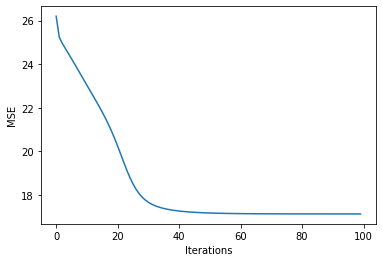

In [27]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(np.arange(0, num_iter, 1), hist)
plt.xlabel("Iterations")
plt.ylabel("MSE")
plt.show()

In [28]:
predictions = latent_user_preferences.dot(latent_item_features.T)
predictions

array([[-3.905, -4.163, -5.629, ..., -2.47 , -6.22 , -2.6  ],
       [ 2.98 ,  3.142,  3.783, ...,  2.513,  3.963,  2.76 ],
       [ 6.866,  7.154,  7.446, ...,  7.341,  7.192,  8.273],
       ...,
       [-0.957, -1.015, -1.303, ..., -0.699, -1.407, -0.752],
       [-1.909, -2.042, -2.857, ..., -1.078, -3.202, -1.111],
       [ 2.793,  2.877,  2.526, ...,  3.602,  2.158,  4.125]])

In [29]:
values = [zip(user_ratings[i], predictions[i]) for i in range(predictions.shape[0])]
comparison_data = pd.DataFrame(values)
comparison_data.columns = train_set.columns

In [30]:
comparison_data

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100
0,"(-7.82, -3.904992618206204)","(8.79, -4.163039193162499)","(-9.66, -5.629476457168732)","(-8.16, -9.540456888767697)","(-7.52, -2.659085840123446)","(-8.5, -1.7824770517528359)","(-9.85, -4.88110059980326)","(4.17, -4.289957700035812)","(-8.98, -8.84450153294285)","(-4.76, -3.7226307345500826)","(-8.5, -1.5949825964473272)","(-6.75, -1.7314057784186396)","(-7.18, -6.475255290479797)","(8.45, -1.5635514794819987)","(-7.18, -6.531794380726057)","(-7.52, -9.960822846224477)","(-7.43, -4.435942596344928)","(-9.81, -5.264264817616817)","(-9.85, -3.7990214114174257)","(-9.85, -6.105935717380765)","(-9.37, 0.4292254562320558)","(1.5, -4.298008644890209)","(-4.37, -6.08505555240527)","(-9.81, -10.562279339724693)","(-8.5, -4.63602103078752)","(1.12, -1.5655738371159085)","(7.82, 3.4217053845102248)","(2.86, -1.6729008901593911)","(9.13, 3.4925934812533166)","(-7.43, -7.929044008131923)","(2.14, 1.1076299967243142)","(-4.08, 3.24039667203119)","(-9.08, -9.425516000687283)","(7.82, -2.6785051693601583)","(5.05, 2.851949397031601)","(4.95, 3.6697353226661695)","(-9.17, -9.11697750203409)","(-8.4, -3.457760998061462)","(-8.4, -2.4973067997352976)","(-8.4, -3.6563532220326485)",...,"(8.59, 1.1966778563382576)","(3.59, 2.1076166687586575)","(-6.84, -5.402818514450819)","(-9.03, -8.313589847387384)","(2.82, 1.3436091046679008)","(-1.36, 1.5220991994380855)","(-9.08, -8.796173818799875)","(8.3, 1.7355142208016556)","(5.68, 1.7626576991749023)","(-4.81, -4.655360138788975)","(99.0, -6.814442518731429)","(99.0, 1.1499573748076044)","(99.0, -3.3949253798951133)","(99.0, -9.220543822558232)","(99.0, -6.062408724113775)","(99.0, 0.526887225675413)","(99.0, -4.248564675705571)","(-9.42, -2.2929589354205264)","(99.0, -5.415073559591917)","(99.0, -2.73257584607166)","(99.0, -1.360492023759176)","(-7.72, -4.669619299484788)","(99.0, -0.3852301418124305)","(99.0, -4.851438849878587)","(99.0, -4.197756484755144)","(99.0, -6.269145120317834)","(99.0, -1.166879294174794)","(99.0, -1.292018714479253)","(99.0, 3.1383140211046046)","(99.0, -5.350643640940276)","(2.82, -1.532465228998601)","(99.0, -3.242314565793968)","(99.0, 0.19682792728309428)","(99.0, -4.769864532515578)","(99.0, -3.9718596910782544)","(99.0, -2.919501271794599)","(-5.63, -2.2150112887636677)","(99.0, -2.470238892825423)","(99.0, -6.220154817995051)","(99.0, -2.6003873473615444)"
1,"(4.08, 2.9801413049665)","(-0.29, 3.142427004191753)","(6.36, 3.7827000262963906)","(4.37, 5.267600492468094)","(-2.38, 2.2017487739092463)","(-9.66, 2.5170925587633617)","(-0.73, 2.9573633716034906)","(-5.34, 2.3168452542666875)","(8.88, 5.074439165447145)","(9.22, 2.9897394338726495)","(6.75, 2.383100848354255)","(8.64, 2.555397210344222)","(4.42, 3.141697461724291)","(7.43, 2.475464504772403)","(4.56, 3.015178801085654)","(-0.97, 4.306526731403338)","(4.66, 2.4496075953464076)","(-0.68, 2.937881722918038)","(3.3, 2.712088727791742)","(-1.21, 3.576836191342095)","(0.87, 1.6131164073945248)","(8.64, 3.4813826795371563)","(8.35, 4.009419073700032)","(9.17, 5.518034584815431)","(0.05, 3.533697258421773)","(7.57, 2.4193386090715676)","(4.71, 0.2296201532385967)","(0.87, 2.3833735439184625)","(-0.39, 0.11363898182903175)","(6.99, 4.868090890456769)","(6.5, 1.247136435012927)","(-0.92, 0.31403774808203105)","(7.14, 5.213459652605939)","(9.03, 2.7601299740785272)","(-1.8, 0.5147183069067963)","(0.73, 0.044074893211660596)","(7.09, 4.852109990599799)","(3.4, 3.060610030153218)","(-0.87, 2.7821904119756815)","(7.91, 3.2095743164087422)",...,"(-6.7, 1.3019768070683906)","(-3.35, 0.875315208723001)","(-9.03, 3.7857784532147307)","(4.47, 4.717746498267649)","(4.08, 1.1482055586195954)","(-3.83, 1.0672604577138445)","(8.74, 4.952791529419964)","(1.12, 0.9413036321865221)","(0.78, 1.006